     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         0         0         1         1         0   
1           1         0         0         0         0         0         0   
2           1         1         1         0         1         1         0   
3           0         0         0         0         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
195         1         1         0         0         1         0         0   
196         1         0         0         0         0         0         0   
197         1         0         0         0         0         0         1   
198         0         1         0         0         0         0         0   
199         1         0         0         0         0         0         1   

     A8_Score  A9_Score  A10_Score  ...  country_of_res_United States  \
0 

<Figure size 1000x600 with 0 Axes>


Final Model Performance on Holdout Set:
ROC-AUC: 0.8989
PR-AUC: 0.5900
F1 Score: 0.7164
Matthews Correlation Coefficient: 0.6425
Mean ROC-AUC: 0.8971056911714914 (95% CI: 0.8804433423366635, 0.9137680400063193)
Mean PR-AUC: 0.44792098774327965 (95% CI: 0.4065294840795214, 0.4893124914070379)
Mean F1 Score: 0.5899143244688239 (95% CI: 0.5521264609280615, 0.6277021880095862)
Mean Matthews Correlation Coefficient: 0.51220533077873 (95% CI: 0.46990303828385116, 0.5545076232736088)


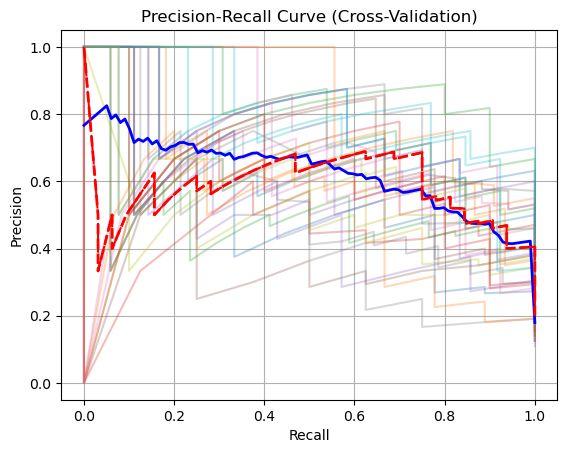

Silhouette Score for Hierarchical Clustering: 0.5942249443148543
Davies-Bouldin Score for Hierarchical Clustering: 0.5786345965935382
Cophenetic Correlation Coefficient: 0.8338529574482709
Cluster Sizes: Counter({2: 70, 1: 70, 3: 37, 0: 23})


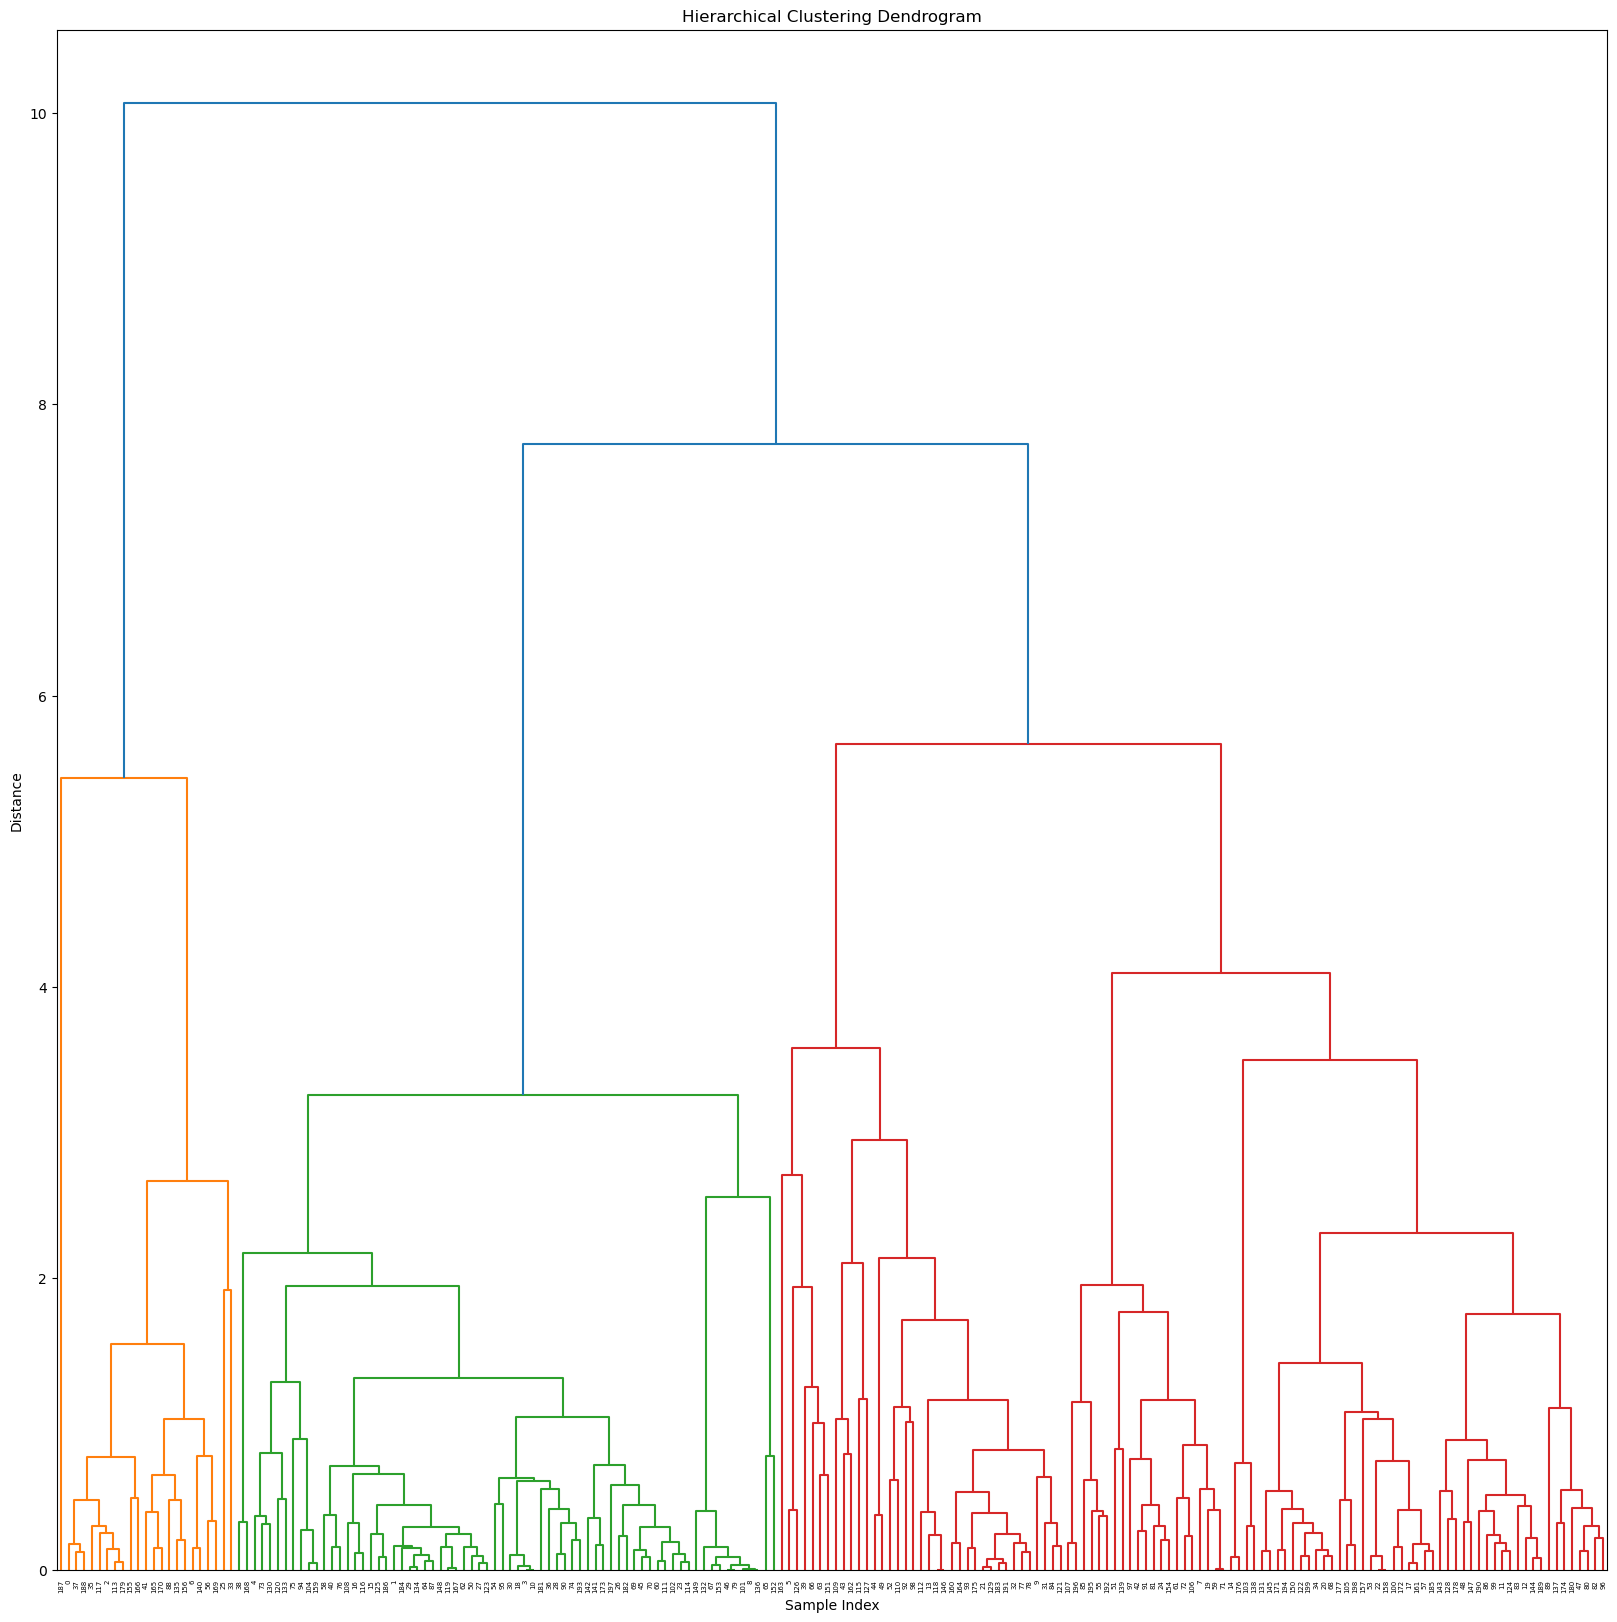

Cluster 0:
         PCA1       PCA2  Cluster
0    4.998235   6.381407        0
2    5.542619   6.349241        0
6    6.710012   5.237551        0
25   3.423789   4.448259        0
33   3.488124   6.369171        0
35   5.706239   6.247195        0
37   5.153150   6.548033        0
41   5.909347   5.193141        0
56   6.700857   4.632177        0
88   5.546557   4.909503        0
113  5.432196   6.422024        0
117  5.370458   6.158498        0
135  5.940825   4.885716        0
140  6.573188   5.294082        0
155  6.062140   6.399628        0
156  6.070677   4.730861        0
165  5.805448   5.496971        0
166  5.974712   5.915835        0
169  6.936532   4.395579        0
170  5.771063   5.639047        0
179  5.399357   6.377572        0
187  6.884169  10.869235        0
188  5.042888   6.503552        0
Cluster 1:
         PCA1      PCA2  Cluster
7   -0.359129 -1.491787        1
11  -0.239109 -3.734746        1
12   0.196285 -3.848456        1
14   2.718379 -6.808054       

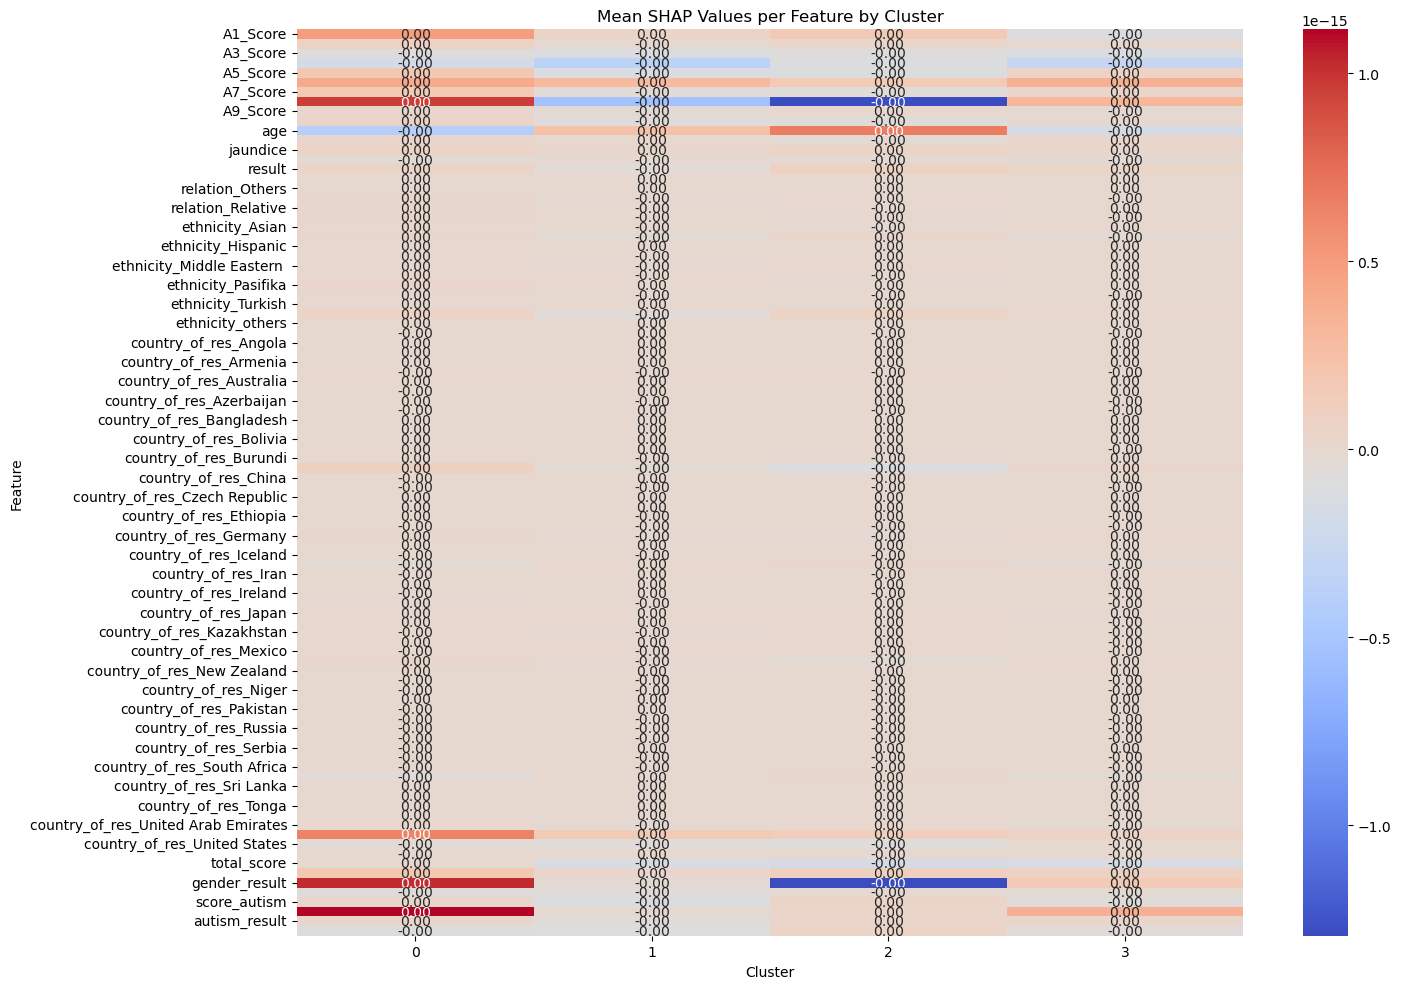

        A1_Score                                                              \
           count      mean       std       min       25%       50%       75%   
Cluster                                                                        
0           23.0  0.658505  0.382432 -0.307226  0.803364  0.803364  0.803364   
1           70.0  0.200472  0.557246 -0.307226 -0.307226 -0.307226  0.803364   
2           70.0  0.327397  0.553568 -0.307226 -0.307226  0.803364  0.803364   
3           37.0  0.383141  0.546047 -0.307226 -0.307226  0.803364  0.803364   

                  A2_Score            ... autism_result             \
              max    count      mean  ...           75%        max   
Cluster                               ...                            
0        0.803364     23.0  0.463393  ...     -0.257435   1.468933   
1        0.803364     70.0  0.264601  ...     -0.257435  11.230807   
2        0.803364     70.0  0.124157  ...     -0.257435  -0.257435   
3        0.803364  

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
# Load the shap values from the RandomForest model
%run RandomForestShap.ipynb  # Make sure shap_values and X_test are defined in there

# Step 1: Average SHAP values across classes (shape: n_samples x n_features)
shap_values_avg = np.mean(shap_values, axis=2)  # If shap_values is shape (n_samples, n_features, n_classes)

scaler = StandardScaler()
shap_scaled = scaler.fit_transform(shap_values_avg)


pca = PCA(n_components=2)
shap_pca = pca.fit_transform(shap_scaled)
#shap_pca = shap_values_avg

# Step 2: Perform hierarchical clustering
model = AgglomerativeClustering(4, linkage='average')
cluster_labels = model.fit_predict(shap_pca)

# Step 5: Generate the linkage matrix
Z = linkage(shap_pca, method='average')

# Step 6: Calculate the Cophenetic Correlation Coefficient
# Use pdist to get the pairwise distances in condensed format
distance_matrix = pdist(shap_pca)
coph_corr, _ = cophenet(Z, distance_matrix)


# Step 3: Evaluate the clustering
silhouette = silhouette_score(shap_pca, cluster_labels)
db_score = davies_bouldin_score(shap_pca, cluster_labels)

print(f"Silhouette Score for Hierarchical Clustering: {silhouette}")
print(f"Davies-Bouldin Score for Hierarchical Clustering: {db_score}")
print(f"Cophenetic Correlation Coefficient: {coph_corr}")

# Check how many samples are in each cluster
cluster_counts = Counter(cluster_labels)
print("Cluster Sizes:", cluster_counts)

from scipy.cluster.hierarchy import dendrogram

# Plot the dendrogram
plt.figure(figsize=(20, 20))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

clustered_data = pd.DataFrame(shap_pca, columns=["PCA1", "PCA2",])
clustered_data['Cluster'] = cluster_labels

# Display the samples in each cluster
for cluster in np.unique(cluster_labels):
    print(f"Cluster {cluster}:")
    print(clustered_data[clustered_data['Cluster'] == cluster])

# Create a DataFrame of SHAP values using feature names from X_test
shap_df = pd.DataFrame(shap_values_avg, columns=X_test.columns)

# Add the cluster labels from hierarchical clustering
shap_df['Cluster'] = cluster_labels

# Compute mean SHAP values for each feature grouped by cluster
cluster_mean_shap = shap_df.groupby('Cluster').mean()

# Transpose for easier plotting (features as rows, clusters as columns)
cluster_mean_shap_T = cluster_mean_shap.T

# Plot the heatmap of SHAP importance per cluster
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_mean_shap_T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Mean SHAP Values per Feature by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


X_with_cluster = X_test.copy()  # Or the appropriate feature set you're using
X_with_cluster['Cluster'] = cluster_labels

#This gives you a statistical summary per cluster:
cluster_profiles = X_with_cluster.groupby('Cluster').describe()
cluster_profiles.to_csv('cluster_profiles.csv')  # Save to CSV if needed

print(cluster_profiles)

#To view just means per feature per cluster:
cluster_means = X_with_cluster.groupby('Cluster').mean()
# Save to CSV if needed
cluster_means.to_csv('cluster_means.csv')
print(cluster_means)




Hierarchical Clustering Dendrogram
each index item is a person and they connect based on some relation to eachother

Mean SHAP Values per Feature by Cluster
this shows what features have an impact on which clusters
blue leans awasy from having asd
red leans twards having asd 
wight means nothing/no lean